In [8]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common and parent modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Get the data you want
from common import get_baseline_data
nba = get_baseline_data('../data/cleaned_data/base_cleaned.csv')
X = nba[['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']].values
y = nba[['inflationAdjSalary_log']].values
y = y/y.max()

c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))


In [10]:
# TSNE (t-distributed stochastic neighbor embedding) evaluation to reduce the dimensions of the data
# Will compute a transform for our data that will convert from 13 dimensions to 2 dimensions so that we can better visualize it
# PCA is linear dimensionality reduction, while T-SNE is nonlinear reducti
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne_results = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

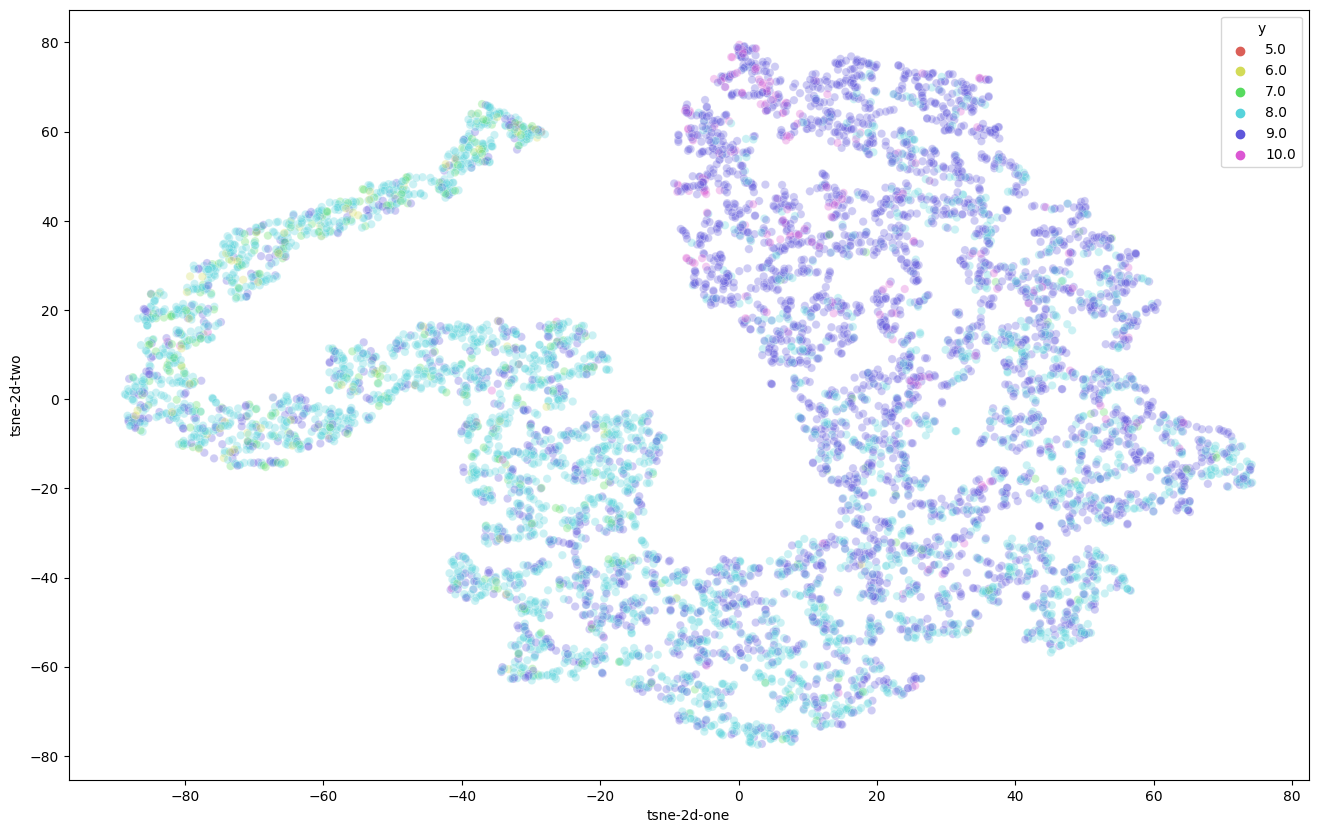

In [11]:
# Plot visualizing all the data across 2 dimensions
import numpy as np
df_subset = {}
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = np.rint(y[:,0] * 10)

plt.figure(figsize=(16,10))
import seaborn as sns
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

This appears to be a good paper explaining what information can be extracted from t-SNE plots
https://distill.pub/2016/misread-tsne/